In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Big_Black_Money_Dataset.csv')

# Print the first few rows of the DataFrame
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [36]:
df.drop(columns=['Person Involved', 'Financial Institution', "Transaction ID", "Date of Transaction"], inplace=True)
df.head()

,Country,Amount (USD),Transaction Type,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Tax Haven Country
0,Brazil,3.267530e+06,Offshore Transfer,Construction,USA,True,Illegal,6,1,Singapore
1,China,4.965767e+06,Stocks Transfer,Luxury Goods,South Africa,False,Illegal,9,0,Bahamas
2,UK,9.416750e+04,Stocks Transfer,Construction,Switzerland,True,Illegal,1,3,Switzerland
3,UAE,3.864201e+05,Cash Withdrawal,Oil & Gas,Russia,False,Illegal,7,2,Panama
4,South Africa,6.433784e+05,Cryptocurrency,Real Estate,USA,True,Illegal,1,9,Luxembourg


In [37]:
# Round the 'Amount (USD)' column to the nearest dollar
df['Amount (USD)'] = df['Amount (USD)'].round()

# Print the first few rows to verify the rounding
df.head()


,Country,Amount (USD),Transaction Type,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Tax Haven Country
0,Brazil,3267530.0,Offshore Transfer,Construction,USA,True,Illegal,6,1,Singapore
1,China,4965767.0,Stocks Transfer,Luxury Goods,South Africa,False,Illegal,9,0,Bahamas
2,UK,94168.0,Stocks Transfer,Construction,Switzerland,True,Illegal,1,3,Switzerland
3,UAE,386420.0,Cash Withdrawal,Oil & Gas,Russia,False,Illegal,7,2,Panama
4,South Africa,643378.0,Cryptocurrency,Real Estate,USA,True,Illegal,1,9,Luxembourg


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Definiere die Zielvariable
def categorize_risk(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Risk Category'] = df['Money Laundering Risk Score'].apply(categorize_risk)

# Kategorisiere Textdaten durch Label-Encoding
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Transaction Type'] = label_encoder.fit_transform(df['Transaction Type'])
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['Destination Country'] = label_encoder.fit_transform(df['Destination Country'])
df['Source of Money'] = label_encoder.fit_transform(df['Source of Money'])
df['Tax Haven Country'] = label_encoder.fit_transform(df['Tax Haven Country'])

# Alternativ: Kategorisiere Textdaten durch One-Hot-Encoding
# df = pd.get_dummies(df, columns=['Country', 'Transaction Type', 'Industry', 'Destination Country', 'Source of Money', 'Tax Haven Country'])

df.head()

,Country,Amount (USD),Transaction Type,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Tax Haven Country,Risk Category
0,0,3267530.0,2,2,9,True,0,6,1,4,Medium
1,1,4965767.0,4,4,5,False,0,9,0,0,High
2,8,94168.0,4,2,6,True,0,1,3,5,Low
3,7,386420.0,0,5,3,False,0,7,2,3,High
4,5,643378.0,1,6,9,True,0,1,9,2,Low


In [41]:
from sklearn.model_selection import train_test_split

# Entferne Zielvariable und korrelierte Features
X = df.drop(columns=['Money Laundering Risk Score', 'Risk Category'])
y = df['Money Laundering Risk Score']  # Zielvariable bleibt

# Split in Training- und Testdaten (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes der Datensätze ausgeben
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 9)
X_test shape: (2000, 9)
y_train shape: (8000,)
y_test shape: (2000,)


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=100),
                           param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}


Random Forest Accuracy: 0.0975
              precision    recall  f1-score   support

           1       0.11      0.09      0.10       225
           2       0.08      0.05      0.06       192
           3       0.13      0.14      0.13       207
           4       0.12      0.13      0.12       196
           5       0.10      0.06      0.08       186
           6       0.09      0.06      0.07       204
           7       0.10      0.08      0.09       213
           8       0.07      0.11      0.09       167
           9       0.10      0.18      0.13       200
          10       0.07      0.08      0.08       210

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.09      2000
weighted avg       0.10      0.10      0.09      2000



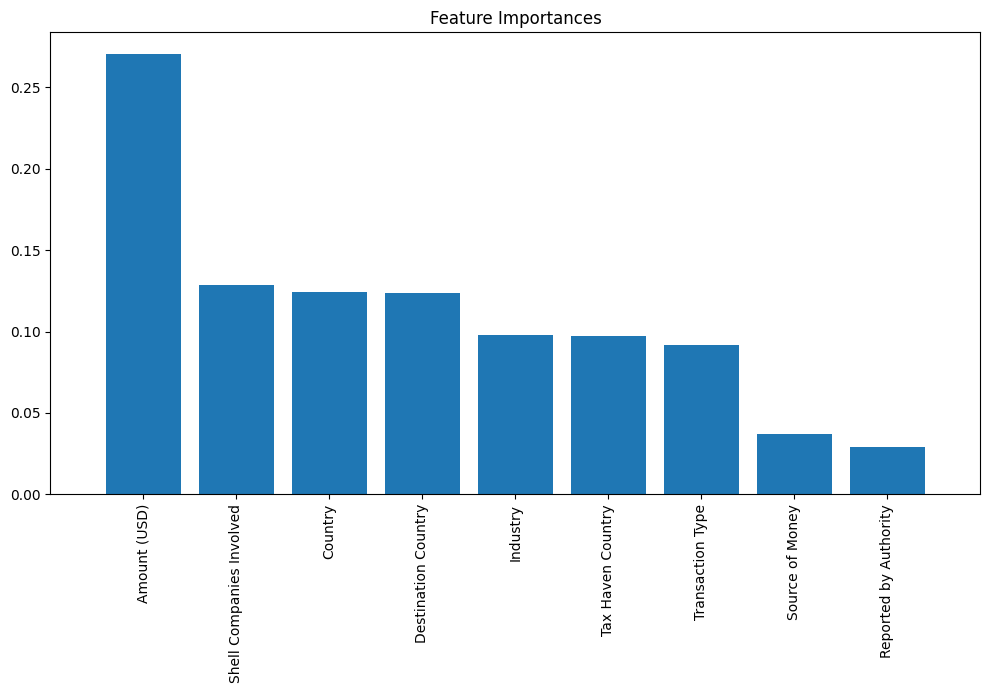

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_leaf=5,
    class_weight=None,
    random_state=100
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Print classification report
print(classification_report(y_test, y_pred_rf))
# Visualize the feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Random Forest Precision: 0.08342219880774727
Random Forest Recall: 0.084
Random Forest F1-Score: 0.08296387919728604


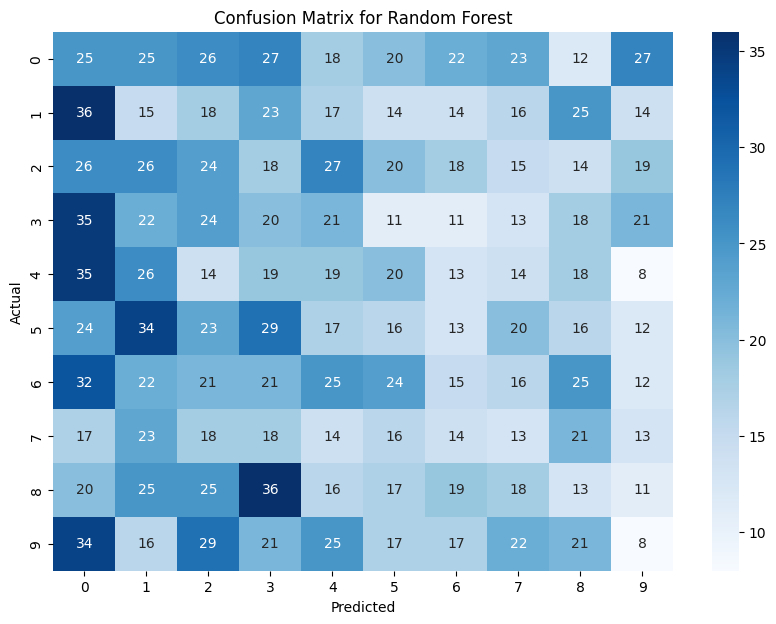

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and f1-score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the precision, recall, and f1-score
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-Score: {f1_rf}")

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()